In [47]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy import optimize
import os
from adjustText import adjust_text

In [48]:
# Brute force method to grab data from Google sheets graphs due to time constraints
def process_graph(string):
    values = string.split()
    values = [float(i) for i in values]
    x = values[::2]
    y = values[1::2]
    return x, y

[0.03, 0.031, 0.035, 0.044, 0.053, 0.41, 0.278, 0.269, 0.281]
[0.03, 0.031, 0.035, 0.044, 0.053, 0.41, 0.278, 0.559, 0.909]
[0.03, 0.031, 0.035, 0.044, 0.053, 0.41, 0.278, 0.438, 0.58]


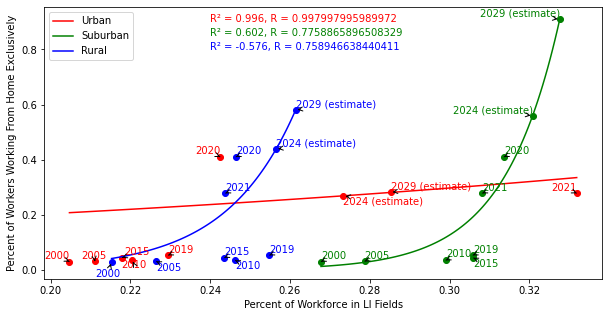

In [57]:
fig, ax = plt.subplots(figsize=(10,5))

# Preliminary graph definitions
cities =[]
colors = ["red", "green", "blue"]
names = ["Urban", "Suburban", "Rural"]
point_labels = ["2000", "2005", "2010", "2015", "2019", "2020", "2021", "2024 (estimate)", "2029 (estimate)"]

# Copied from our Google sheets
graphs = ['''0.2047387524	0.03
0.2111259059	0.031
0.2203910303	0.035
0.2179658165	0.044
0.2294722617	0.053
0.2425311627	0.41
0.3318589061	0.278
0.2734	0.269
0.2852	0.281''',
          '''0.2677751799	0.03
0.278707945	0.031
0.299046107	0.035
0.3059464286	0.044
0.3058205128	0.053
0.3136300185	0.41
0.308201132	0.278
0.3208	0.559
0.3276	0.909''',
          '''0.2152968701	0.03
0.2264936669	0.031
0.2462649326	0.035
0.2435468118	0.044
0.2548404718	0.053
0.2464485981	0.41
0.2438207509	0.278
0.2565	0.438
0.2614	0.58''', ]


# Populate graph
for color, name, graph in zip(colors, names, graphs):
    x, y = process_graph(graph)
    cities.append([name, x, y])


# Each equation has the coefficients to an exponential model, grabbed from an excel regression
equations = [[0.0962, 3.76], [6.31 * (10 ** -11), 71.4], [1.86 * 10 ** -7, 57.2]]

text_labels = []

# Populate graph with city types
for city, color, equation in zip(cities, colors, equations):
    ax.scatter(city[1], city[2], color=color)
    print(city[2])
    polyline = np.linspace(min(city[1]), max(city[1]), 100)
    polyspace = equation[0] * np.exp(polyline * equation[1])
    ax.plot(polyline, polyspace, color=color, label=city[0])
    for x, y in zip(city[1], city[2]):
        text_labels.append(ax.annotate(point_labels[city[1].index(x)], xy=(x,y), color=color))


# Add axis labels
ax.set_xlabel("Percent of Workforce in LI Fields")
ax.set_ylabel("Percent of Workers Working From Home Exclusively")

# R-squared values, also grabbed from an excel file because it was faster to grab them than to automate them
R_squared_values = [0.996, 0.602, -0.576]
plt.text(0.24, 0.9, f'R² = {R_squared_values[0]}, R = {abs(R_squared_values[0]) ** 0.5}', color="red")
plt.text(0.24, 0.85, f'R² = {R_squared_values[1]}, R = {abs(R_squared_values[1]) ** 0.5}', color="green")
plt.text(0.24, 0.8, f'R² = {R_squared_values[2]}, R = {abs(R_squared_values[2]) ** 0.5}', color="blue")

# Put legend, save the image for use in the paper, and show the image
# Stop label intersection and add arrows from each point label to its corresponding point with adjustText by Phlya
ax.legend()
adjust_text(text_labels, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='k', lw=1))
currentwd = os.getcwd().replace('\\', '/')
plt.savefig(f"{currentwd}/cities/problem3.png", dpi=200)
plt.show()